In [ ]:
a = pd.read_csv('tested.csv', usecols=['Age','Sex','Survived', 'Pclass'])

In [ ]:
a['New_col'] = np.where(a['Sex']=='male', 1, 0) # feeds 1 into new col when sex=male else feeds 0

In [48]:
## Dataframe from list

c = [[1,2014,4,1,1,1,1,0]]
test = pd.DataFrame(c, columns=['Car_Name','Year','Present_Price','Owner','Individual', 'Manual','Diesel','Petrol'])

## Dataframe from Dictionary

d = {'Car_Name':[1],'Year':[2014],'Present_Price':[4],'Owner':[0],'Individual':[1], 'Manual':[1],'Diesel':[1],'Petrol':[0]}
test1 = pd.DataFrame.from_dict(d)

In [ ]:
c = a.append(b, ignore_index=True, sort=True) ## Union of two dataframes 

In [ ]:
## getting # of rows and columns in a dataframe
rows = a.shape[0]
cols = a.shape[1]

# NaN 

In [ ]:
a.isnull().sum() ## gives number of NaN in each column

In [ ]:
a.isnull().mean() ## gives number of NaN in % form

In [ ]:
sns.heatmap(a.isnull()) ## Gives overview of nulls in all columns in one map

# Missing values
- Numerical values
    1. Mean/Median/Mode
        - Median better than mean as outlier data affects in case of taking mean
        - Used when data missing at random
        - Issue - Distorts distribution of data
    2. Random Sample Imputation  (Most used)
        - Doesn't affect the distribution of data 
        - Issue: randomness works in most cases but not every time
    3. End of Distribution Imputation 
        - Used when missing data are not at random
        - Issue - distorts original distribution + leads to inclusion of outliers if large # of NaNs
- Categorical values
    1. Frequent Category Imputation 
        - Not good for large # of NaN (if doing then add extra feature/col)
    2. Replacing NaN with new category 
        - most used
        - good for large # of NaN

###### 1. Mean/Median/Mode

In [ ]:
a['Age'].fillna(a['Age'].mean(), inplace = True) ## replaces with mean / median 

###### 2. Random Sample Imputation  (Most used)


In [ ]:
a['Age'].sample(4) ## returns 4 sample values from age column

In [ ]:
a['Age'].dropna().sample(4) ## returns 4 sample values from age column after dropping NaN values

In [ ]:
b = a['Age'].dropna().sample(a['Age'].isnull().sum(), random_state=0) 
                                                ## random_state = 0 ensures values doesnt change after every iteration
                                                ## returns x sample values from age column after dropping NaN values 
                                                ## where x is number of NaN values in coloumn

In [ ]:
b.index = a[a['Age'].isnull()].index ## b need to have same index as a in order to get merged 

In [ ]:
a.loc[a['Age'].isnull(), 'Age'] = b ## assigns values of b onto the index of NaN values 
                                    ## map() funciton doesn't work here

###### 3. End of Distribution Imputation 

In [ ]:
a.Age.mean() + 3*a.Age.std() ## returns value beyond 3sigma ie value at the end of distribution
                            ## since in Boxplots points beyond it are considered as outliers

####  Missing Categorical values

   ###### 1. Frequent Category Imputation

In [ ]:
a.Pclass.value_counts() ## returns the different categories in row Pclass
a.Pclass.mode() 

In [ ]:
a.Pclass.value_counts(ascending=False).index[0] ## returns the most frequent cateogry in row Pclass

In [14]:
a.Age.fillna(a.Age.mode, inplace=True) ## Replacing Nan with most frequent / highest count category

###### 2. Replacing NAN with new category (Most used)

In [ ]:
a.Cabin.fillna('missing')

In [ ]:
a['Cabin'] = np.where(a.Cabin.isnull(), 'missing', a['Cabin'] ) ## Replaces 'missing' in place of NAN while keeps other 

# Encoding
- Converting categorical features into dummy/indicator variables to feed into ML algorithm
- Types
    1. Nominal Encoding
        - One Hot Encoding
           - Can lead to dummy variable trap if one col not removed which leads to multicollinearity 
        - Frequency / Count Encoding
        - Probability Ratio / Mean Encoding
    2. Ordinal Encoding
        - Label Encoder
            - issue: it ends up assigning rank to categorical values which might impact our model
            - To overcome this we use one-hot encoding
        - Target Guided Ordinal Encoding

### Nominal Encoding

###### 1. One Hot Encoding

In [ ]:
b = pd.get_dummies(a.Sex, drop_first=True) ## drop_first ensures we avoid Dummy_variable_Trap (n-1 columns enough to deduce nth)

In [ ]:
a = a.drop(['Sex'], axis =1)

In [ ]:
a = pd.concat([a, b], axis = 1) ## adds one-hot encoded columns 

###### 2. Count / Frequency Encoding

In [ ]:
b = a['Cabin'].value_counts().to_dict() ## gives the diff categories and their count in 'Cabin' col and stores it in dict 

In [ ]:
a['Cabin'] = a['Cabin'].map(b) ## replaces the different categories in 'Cabin' col with their count/frequency 

###### 3. Mean Encoding / Probability Ratio Encoding

In [ ]:
b = a['Cabin'].value_counts().to_dict()

### Ordinal Encoding

###### 1. Target Guided Ordinal Encoding

Replace the labels according to the target

In [ ]:
b = a.groupby(['Cabin'])['Survived'].mean()

# Scaling


######   1. Standardisation (Most used)
Bringing all the variables / features to similar scale (b/w 0-1)
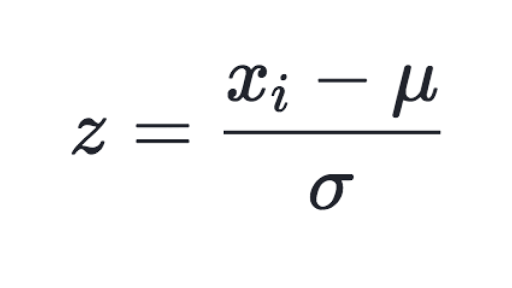

In [ ]:
scaler = StandardScaler() ## from seaborn.preprocessing import StandardScaler

In [ ]:
a_new = scaler.fit_transform(a) ## scaling values in all coloumns

In [ ]:
b = pd.DataFrame(a_new, columns=a.columns) ## storing the scaled data in table / Dataframe form

######  2. Min Max Value
Scales the values between 0-1 with min=0 and max=1

In [ ]:
min_max = MinMaxScaler()

In [ ]:
b = pd.DataFrame(min_max.fit_transform(a), columns=a.columns)

######  3. Robust Scaler (median and quartile)
Used to scale the features to median and quantiles: 
X_scaled = (X - X_median) / IQR, where
IQR = 75th percentile - 25th percentile

In [1]:
scaler = RobustScaler()

<IPython.core.display.Javascript object>

In [ ]:
b = pd.DataFrame(scaler.fit_transform(a), columns = a.columns)

## Gaussian (Normal) Transformation 
- If variables are not normally distributed (inverted-bell curve) then we use some techniques to make it normally distributed.
- This is req as some ML models (Liniear regression) assume that data is normally distributed. 
- KDE, Q-Q plot are used to check whether data is gaussian/normally distributed
- Some techniques are:

    - Logarithmic Transformation
    - Reciprocal Trasnformation
    - Square root Transformation
    - Exponential Transformation
    - Boxcox Transformation

In [ ]:
a.skew() ## checks skewnwess of data
        ## [-0.5 to 0.5]: symmetric ie normally distributed
        ## [-0.5 to -1] and [0.5 to 1]: moderately -ve and +ve skewed respectively
        ## >-1 and >1 : highly -ve or +ve skewed respectively

In [ ]:
import scipy.stats as stats       ## Q-Q plot
import pylab
stats.probplot(a['Age'], plot=pylab)

###### Logarithmic Distribution
works well for right/left skewed data as it converts them to gaussian distributed 

In [ ]:
a['Age_log'] = np.log(a.Age)

###### Reciprocal Transformation

In [ ]:
a['Age_reciprocal'] = 1/a.Age

###### Square root Transformation

In [ ]:
a['Age_sqr'] = df.age**(1/2)

###### Exponential Transformation

In [ ]:
a['Age_expo'] = a.Age**(1/1.2)

###### Boxcox Transformation

Transforms variables using a parameter whose value varies from 5 to -5. In the transformation all the values of this parameter is considered and the optimal value for the given variable is selected (using Profile-likelyhood fuction)
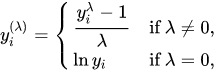

In [ ]:
a['age_boxcox'],parameters=stats.boxcox(a['Age'])

## Imbalanced Data
- Found in Fraud detection, spam filtering, disease screening, etc
- Most ML models work best when number of samples in each class is almost equal 
- Using imbalanced data one just by predicting majority class but fails to capture minority class which is the main obj of creating the model in the firts place
- Using imbalanced data one predicts majority class with 100% accuracy while minority class with 0% accuracy
- Other parameters to guage model
    - Confusion Matrix
    - Recall
    - Precision
- Techniques to convert imbalanced ==> Balanced data
    - Resampling: 
        - removing samples from majority class (under-sampling) or adding samples to minority (over-sampling)
        - Disadv: Loss of info in under-sampling and overfitting (catching false pattern) in case of over-sampling
    - Clustered Resampling:
        - cluster the records and then do under/over sampling inorder to preserve info
    - Tomek Links:
        - Tomek links are pairs of very close instances but of opposite class
        - Removes the majority class form these Tomek link pairs
        - Increases the space between two classes hence facilitating the classification process
    - SMOTE:
        - Synthetic Minority Over-sampling Technique
        - Synthetic points are inserted between a randomly chosen point and its k-nearest neighbours
- Models that work well with imbalanced data
    - Random Forest
    - Gradient Boosted trees
    - Penalized-SVM (increases the cost of classification mistakes on the minority class
    
- Conclusion: Always go for ensemble techniques (Random forest, XG Boost, etc)

##### Random Sampling

In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [7]:
rus = RandomUnderSampler(0.8, random_state=0) ## majority class under-sampled to extent that 0.8*Majority = minority
                                            ## random_state=0 ensures same values are generated after every iteration

In [ ]:
ros = RandomOverSampler(0.4) ## over-samples minority class to 50% of majority class

In [ ]:
X_train_new, y_train_new = rus.fit_resample(X_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_new, y_train_new)
predictions = rfc.predict(X_test)

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, predict)
confusion = metrics.confusion_matrix(y_test, predict)

##### SMOTE Tomek
- Under-sampling using Tomek while over-sampling using SMOTE 
- Takes more time than simple over-smapling as new points are generated based on K-Nearest neighbours

In [10]:
from imblearn.combine import SMOTETomek

In [ ]:
st = SMOTETomek(0.7) ## will make minority class 0.7 times majority class

In [ ]:
X_train_new, y_train_new = st.fit_resample(X_train,y_train)

##### Ensemble Technique

In [11]:
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:
easy = EasyEnsembleClassifier()

## Outliers and their impact

- Data that diverges from well-structured data
- Importance in examples like credit fraud detection, cybercrimes as these are usually very different form conventional value
- Keeping/Removing outliers depends on the domain in which one is working (eg Titanic data no need)
- Significantly affects correlation 
- ML Models sensitive to Outliers
    - SVM: Not sensitive
    - Linear/Logistic Regression: Sensitive
    - Naivye Bayes Classifier: Not sensistive
    - KNN: Not Sensitive
    - Decision Trees: Not sensitive 
    - Ensemble techniques (RF,XGBoost): Not sensitive
    - KMeans: Sensitive 
    - PCA: Sensitive
    - Hierarichal: Sensitive
    - Neural Networks: Sensitive

###### For Gaussian Distribution
The boundary for outlier is taken as 3*SD

In [ ]:
def outlier_func(a,variable):
    upper_boundary = a[variable].mean() + 3*a[variable].std()
    lower_boundary = a[variable].mean() - 3*a[variable].std()
    if lower_boundary < 0: 
        lower_boundary = 0
    print(upper_boundary)
    print(lower_boundary)

In [ ]:
a['Age'] = np.where(a.Age>upper_boundary, upper_boundary, a.Age) ## Replacing outliers with upperlimit as no loss of info 

###### For Skewed Distribution

In [ ]:
IQR = a['Age'].quartile(0.75) - a['Age'].quartile(0.25) ## Inter Quartile Range 

In [ ]:
lower_bridge = a['Age'].quartile(0.25) - (IQR*3) ## 1.5 decided based on domain of dataset
upper_bridge = a['Age'].quartile(0.75) + (IQR*3) ## this limit is what is shown in Boxplot